In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:


      
        

class neural_net:
  def __init__(self,input , y ,nodes_per_layer,activations , print_weights=False):
#     x shape is  (3, 8)
#     X  is 
#      [[ 3  4  3 33 23 53  3 33]
#       [ 4  1  9 42 44 64 64 34]
#       [ 2  2  4  2 25 72  2 42]]
#     y shape is (2, 8)
#     y  is 
#       [[1 0 1 0 0 1 1 1]
#        [1 1 0 0 1 0 1 0]]

    n=input.shape[0]
    d=input.shape[1]
    #initializing the weights

    self.input=input
    self.input_shape=self.input.shape        #n[0] x m .....3x8
    self.num_samples=self.input.shape[0]           # 8
    self.nodes_per_layer=nodes_per_layer
    self.activations=activations
    self.y=y                    #n[l] x 1   ............2x8
    self.weights=[]
    self.b=[]
    layer_weights = torch.empty(self.nodes_per_layer[0]*d).normal_(mean=0,std=0.001).reshape(self.nodes_per_layer[0] , d)
    layer_bias = torch.empty(self.nodes_per_layer[0]).normal_(mean=0,std=0.001).reshape( self.nodes_per_layer[0] , 1)  #10000 x 1
    self.weights.append(layer_weights)
    self.b.append(layer_bias)
    if print_weights:
      print( 'layer 1 weights shape is',layer_weights.shape)
      print( 'layer 1 weights  is \n',layer_weights)

      print( 'layer 1 bias shape is',layer_bias.shape)
      print( 'layer 1  bias  is',layer_bias)


    for i in range(self.nodes_per_layer.shape[0]-1):    #[4,3,2]
      layer_weights = torch.empty(self.nodes_per_layer[i+1]*self.nodes_per_layer[i]).normal_(mean=0,std=0.001).reshape(self.nodes_per_layer[i+1],self.nodes_per_layer[i])
      self.weights.append(layer_weights)
      layer_bias = torch.empty(self.nodes_per_layer[i+1]).normal_(mean=0,std=0.001).reshape( self.nodes_per_layer[i+1] , 1)
      self.b.append(layer_bias)
      if print_weights:
        print( 'layer ',str(i+2) ,' weights shape is',layer_weights.shape)
        print( 'layer ',str(i+2) ,' weights  is \n',layer_weights)

        print( 'layer ',str(i+2) ,' bias shape is',layer_bias.shape)
        print( 'layer ',str(i+2) ,' bias  is \n',layer_bias)

    

  def forward_propagation(self , input):

    # print('forward propadation')
    self.a=[]         #[4,1],[3,1],[2,1]
    z=torch.mm(self.weights[0] , input.t()) + self.b[0]
    self.layer_output =self.Activation(z,self.activations[0]) 
    self.a.append(self.layer_output)

    for i in range(1,self.nodes_per_layer.shape[0]):    #[4,3,2]
      z=torch.mm(self.weights[i] , self.layer_output) + self.b[i]
      self.layer_output=self.Activation(z,self.activations[i]) 
      self.a.append(self.layer_output)
      # print('layer ' , str(i+1) ,' output \n',self.layer_output)

    # print('a= \n',self.a)
    return self.a[-1]


  def back_propagation(self ,lr=0.01):

    self.dz=self.a.copy()
    self.dw=self.weights.copy()
    self.db=self.b.copy()

    self.dz[-1]=2 * (self.a[-1].t() - self.y) * self.Activation_derivative(self.a[-1].t() , activation=self.activations[-1])
    self.dw[-1]=torch.mm(self.dz[-1].t() , self.a[-2].t()) * (1/self.num_samples)
    self.db[-1]=torch.sum(self.dz[-1].t(),axis=1,keepdims=True) * (1/self.num_samples)

    for i in range(-(self.nodes_per_layer.shape[0]-2),1):    #[4,3,2]
      i=-i             #1,0
      self.dz[i]=torch.mm(self.dz[i+1] , self.weights[i+1] ) * self.Activation_derivative(self.a[i].t() , activation=self.activations[i])
      self.db[i]=torch.sum(self.dz[i].t(),axis=1,keepdims=True) * (1/self.num_samples)

      if(i!=0):
        self.dw[i]=torch.mm(self.dz[i].t() , self.a[i-1].t()) * (1/self.num_samples)

      elif(i==0):
        self.dw[i]=torch.mm(self.dz[i].t() , self.input) * (1/self.num_samples)


    self.gradient_discent(self.weights,self.dw,self.b,self.db,lr=lr)

  def gradient_discent(self,w,dw,b,db,lr):
    for i in range(len (self.weights)):
      self.weights[i]=w[i]-lr * dw[i]
      self.b[i]=self.b[i]-lr * db[i]

    
  def train(self,epochs , lr=0.01 , verbose=True):
    self.loss=[]
    for i in range(epochs):
      if verbose: print ('epoch ',str(i+1) ,'/',epochs)
      self.forward_propagation(self.input)
      self.loss.append(torch.mean ( self.l2_loss( self.y , self.a[-1].t() ) ) )
      self.back_propagation(lr=lr)
      if verbose : print('loss= ',self.loss[i])
      if verbose : print('-------'*10)

    plt.plot(self.loss)
    plt.ylabel('loss')
    plt.show()

    # self.accuracy(self.a[-1] , self.y)

    return self.loss, self.a[-1]

  def sigmoid(self,z):
    s= 1/(1 + np.exp(-z)) 
    return s

  def Relu(self,z):
    return np.maximum(0,z)

  def tanh(self,z):
    return (np.exp(z) - np.exp(-z))/(np.exp(z) + np.exp(-z))

  def softmax(self,y):
    exps = np.exp(y)
    return exps / np.sum(exps)

  def Activation(self,z,method='sigmoid'):
    
      if (method=='sigmoid'):
        return self.sigmoid(z)
      elif(method=='tanh'):
        return self.tanh(z)
      elif (method=='Relu'):
        return self.Relu(z)
      elif method==None:
        return z
      else :
        return z
        
  def predict(self , input):

    z=torch.mm(self.weights[0] , input.t()) + self.b[0]
    layer_output =self.Activation(z,self.activations[0]) 
    for i in range(1,self.nodes_per_layer.shape[0]):    #[4,3,2]
      z=torch.mm(self.weights[i] , layer_output) + self.b[i]
      layer_output=self.Activation(z,self.activations[i]) 


    return layer_output


  def Activation_derivative(self,a,activation='sigmoid'):
    if (activation=='sigmoid'):
      return a * (1-a)
    elif (activation=='tanh'):
      return 1-a**2
    elif (activation=='Relu'):
      return np.minimum(-np.maximum(0,z),1)

  def l2_loss(self , y_pred , y):
  # return torch.sum(torch.pow(y - y_pred ,2) , axis=1 ) #nx1
    return torch.norm(y-y_pred , dim=1)**2
  
 
  def cross_entropy_loss(self,a, y):
    return - np.mean(
        np.multiply(y, np.log(a)) + np.multiply((1-y), np.log(1-a)))
    
  def accuracy(self , a , Y):
    correct=0
    for i in range(Y.shape[0]) :
      if torch.argmax( a.t() , axis=1 )[i]==torch.argmax( Y , axis=1 )[i]:
        correct+=1
    tr_acc=(correct / Y.shape[0]) * 100
    print('train accuracy = ',tr_acc , '%')


 
   
  

### Loading mnist dataset from keras.datasets

In [ ]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0


11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

### preprocessing the data

In [ ]:
x_train = x_train.reshape(-1 , 28*28)
x_test = x_test.reshape(-1 , 28*28)
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)

y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)



### Creating the model

In [ ]:
nn=neural_net(x_train , y_train ,nodes_per_layer = np.array([128,10]) , activations=np.array(['tanh','sigmoid']) )   #  (self,input,nodes_per_layer,activations,y):


### Training the model

Streaming output truncated to the last 5000 lines.
epoch  1 / 1000
BP
self.db[0] shape :  torch.Size([128, 1])
loss=  tensor(2.5004)
----------------------------------------------------------------------
epoch  2 / 1000
BP
self.db[0] shape :  torch.Size([128, 1])
loss=  tensor(2.4603)
----------------------------------------------------------------------
epoch  3 / 1000
BP
self.db[0] shape :  torch.Size([128, 1])
loss=  tensor(2.4211)
----------------------------------------------------------------------
epoch  4 / 1000
BP
self.db[0] shape :  torch.Size([128, 1])
loss=  tensor(2.3827)
----------------------------------------------------------------------
epoch  5 / 1000
BP
self.db[0] shape :  torch.Size([128, 1])
loss=  tensor(2.3448)
----------------------------------------------------------------------
epoch  6 / 1000
BP
self.db[0] shape :  torch.Size([128, 1])
loss=  tensor(2.3070)
----------------------------------------------------------------------
epoch  7 / 1000
BP
self.db[0] s

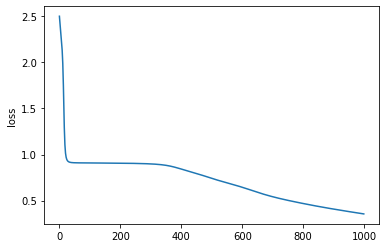

In [ ]:
loss , y_pred = nn.train(1000 ,lr=0.1)


### Predicting for the test data

In [ ]:
y_pred = nn.predict( x_test )
nn.accuracy(y_pred,y_test)


self.weights[0] shape torch.Size([128, 784])
self.b[0] shape torch.Size([128, 1])
layer 0  ouptut shape  torch.Size([128, 10000])
self.weights[1] shape torch.Size([10, 128])
self.b[1] shape torch.Size([10, 1])
layer 1 ouptut shape  torch.Size([10, 10000])
train accuracy =  84.15 %
